In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

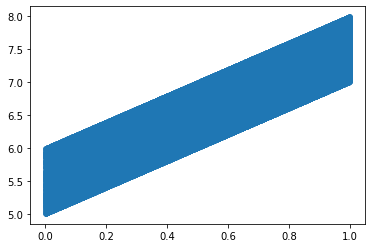

In [39]:
N = 2
M = 100_000_0
X = np.random.rand(M,1)
y = 5 + 2*X + np.random.rand(M,1)
plt.plot(X,y, '.')

X_b = np.c_[np.ones((M,1)), X] # add x0 = 1 for all examples

In [41]:
## Least squares implementation
theta_ls = la.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_ls)

[[5.49956301]
 [2.0017715 ]]


In [44]:
## Gradient descent
eta = 0.1
theta_gd = np.random.rand(N,1)
for i in range(1000):
    dMSE = 2/M * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd -= eta * dMSE
print(theta_gd)

[[5.49956256]
 [2.00177234]]


In [78]:
## Stochastic gradient descent
batch_size = 1000
n_epochs = 50
t0, t1 = 0.01, 100

def learning_schedule(t):
    return t0 / (t + t1)

theta_sgd = np.random.rand(N,1)
for epoch in range(n_epochs):
    for i in range(M // batch_size):
        j = np.random.randint(M)
        xj = X_b[j:min(j+batch_size, M - 1)]
        yj = y[j:min(j+batch_size, M - 1)]
        dMSE = 2 * xj.T.dot(xj.dot(theta_sgd) - yj)
        eta = learning_schedule(epoch * M + i)
        theta_sgd -= eta * dMSE
print(theta_sgd)

[[5.48493241]
 [2.03050787]]


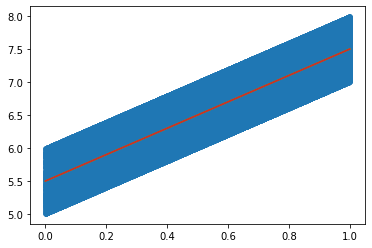

In [46]:
X_reg = np.array([[0],[1]])
X_reg_b = np.c_[np.ones((N,1)), X_reg]

y_ls  = X_reg_b.dot(theta_ls)
y_gd  = X_reg_b.dot(theta_gd)
y_sgd = X_reg_b.dot(theta_sgd)

plt.plot(X,y, '.')
plt.plot(X_reg, y_gd)
plt.plot(X_reg, y_ls)
plt.plot(X_reg, y_sgd)